In [4]:
import re

format_pat = re.compile(
    r"(?P<host>\d+\.\d+\.\d+\.\d+)\s"
    r"(?P<identity>\S*)\s"
    r"(?P<user>\S*)\s"
    r"\[(?P<time>.*?)\]\s"
    r'"(?P<request>.*?)"\s'
    r"(?P<status>\d+)\s"
    r"(?P<bytes>\d+)\s"
    r'"(?P<referer>.*?)"\s'
    r'"(?P<user_agent>.*?)"'
)

In [5]:
logPath = "/content/access_log.txt"

In [6]:
from os import access

urlCount = {}

with open(logPath, "r") as f:
    for line in (l.rstrip() for l in f):
        matched = re.match(format_pat, line) # comando atualizado enter python2 e python3
        if matched:
            access = matched.groupdict()
            request = access['request']
            fields = request.split()
            if(len(fields) == 3):
                url = fields[1]
                if url in urlCount:
                    urlCount[url] += 1
                else:
                    urlCount[url] = 1



In [7]:
results = sorted(urlCount, key=lambda i: int(urlCount[i]), reverse=True)
for result in results[:20]:
    print(f"{result} : {urlCount[result]}")

/xmlrpc.php : 67505
/wp-login.php : 1923
/ : 332
/blog/ : 136
/robots.txt : 121
/sitemap_index.xml : 117
/post-sitemap.xml : 117
/page-sitemap.xml : 116
/category-sitemap.xml : 116
/orlando-headlines/ : 93
/san-jose-headlines/ : 85
http://51.254.206.142/httptest.php : 80
/comics-2/ : 76
/travel/ : 72
/entertainment/ : 70
/world/ : 70
/weather/ : 70
/business/ : 69
/national-headlines/ : 69
/defense-sticking-head-sand/ : 69


In [8]:
userAgents = {}

with open(logPath, "r") as f:
    for line in (l.rstrip() for l in f):
        matched = re.match(format_pat, line)
        if matched:
            access = matched.groupdict()
            agent = access['user_agent']
            if agent in userAgents:
                userAgents[agent] += 1
            else:
                userAgents[agent] = 1

In [9]:
results = sorted(userAgents, key=lambda i: int(userAgents[i]), reverse=True)
for result in results:
    print(f"{result} : {userAgents[result]}")

Mozilla/4.0 (compatible: MSIE 7.0; Windows NT 6.0) : 68484
- : 4031
Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5.0) : 1723
W3 Total Cache/0.9.4.1 : 468
Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html) : 248
Mozilla/5.0 (compatible; Baiduspider/2.0; +http://www.baidu.com/search/spider.html) : 181
Mozilla/5.0 (Windows NT 6.1; WOW64; rv:40.0) Gecko/20100101 Firefox/40.0 : 144
Mozilla/5.0 (iPad; CPU OS 8_4 like Mac OS X) AppleWebKit/600.1.4 (KHTML, like Gecko) Version/8.0 Mobile/12H143 Safari/600.1.4 : 110
Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/46.0.2490.86 Safari/537.36 : 107
Mozilla/5.0 (compatible; bingbot/2.0; +http://www.bing.com/bingbot.htm) : 43
Opera/9.80 (Windows NT 6.0) Presto/2.12.388 Version/12.14 : 40
Mozilla/5.0 (compatible; MJ12bot/v1.4.5; http://www.majestic12.co.uk/bot.php?+) : 34
Mozilla/5.0 (Linux; Android 5.1.1; SM-G900T Build/LMY47X) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/46.0.2490.76 Mobile 

In [19]:
urlCounts = {}

with open(logPath, "r") as f:
    for line in (l.rstrip() for l in f):
        matched = re.match(format_pat, line) # comando atualizado enter python2 e python3
        if matched:
            access = matched.groupdict()
            agent = access['user_agent']

            if(not ('bot' in agent or 'spider' in agent or 'Bot' in agent or 'Spider' in agent or 'W3 Total Cache' in agent or agent == '-')):
                request = access['request']
                fields = request.split()
                if(len(fields) == 3):
                    (action, url, protocol) = fields
                    if(url.endswith('/')):
                        if(action == 'GET)'):
                            if(url in urlCount):
                                urlCount[url] += 1
                            else:
                                urlCount[url] = 1


results = sorted(urlCount, key=lambda i: int(urlCount[i]), reverse=True)
for result in results:
    print(f"{result} : {urlCount[result]}")

/xmlrpc.php : 67505
/wp-login.php : 1923
/ : 332
/blog/ : 136
/robots.txt : 121
/sitemap_index.xml : 117
/post-sitemap.xml : 117
/page-sitemap.xml : 116
/category-sitemap.xml : 116
/orlando-headlines/ : 93
/san-jose-headlines/ : 85
http://51.254.206.142/httptest.php : 80
/comics-2/ : 76
/travel/ : 72
/entertainment/ : 70
/world/ : 70
/weather/ : 70
/business/ : 69
/national-headlines/ : 69
/defense-sticking-head-sand/ : 69
/national/ : 68
/australia/ : 68
/technology/ : 67
/about/ : 66
/science/ : 65
/san-jose-sports/ : 62
/no-hate-news/ : 61
/national-sports/ : 60
/seattle-headlines/ : 60
/introducing-comment-killer/ : 60
/filter-bad-news-restore-faith-humanity/ : 60
/sports/ : 60
/creating-good-comics-experience/ : 59
/phoenix-headlines/ : 59
/san-francisco-sports/ : 59
/washington-dc-sports/ : 59
/orlando-sports/ : 58
/dallas-headlines/ : 58
/chicago-sports/ : 58
/dallas-sports/ : 58
/houston-headlines/ : 58
/philadelphia-headlines/ : 58
/houston-sports/ : 58
/seattle-sports/ : 58
/

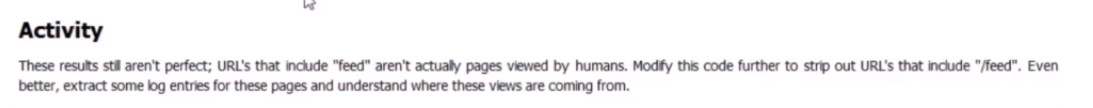

jogar as url's em um dataframe, verificar os endereços e fazer o tratamento do trecho '/feed'

In [21]:
urlCounts = {}

with open(logPath, "r") as f:
    for line in (l.rstrip() for l in f):
        matched = re.match(format_pat, line) # comando atualizado enter python2 e python3
        if matched:
            access = matched.groupdict()
            agent = access['user_agent']

            if(not ('bot' in agent or 'spider' in agent or 'Bot' in agent or 'Spider' in agent or 'W3 Total Cache' in agent or agent == '-')):
                request = access['request']
                fields = request.split()
                if(len(fields) == 3):
                    (action, url, protocol) = fields
                    if(url.endswith('/')):
                        if("/feed" not in url):
                            if(action == 'GET)'):
                                if(url in urlCount):
                                    urlCount[url] += 1
                                else:
                                    urlCount[url] = 1


results = sorted(urlCount, key=lambda i: int(urlCount[i]), reverse=True)
for result in results:
    print(f"{result} : {urlCount[result]}")

/xmlrpc.php : 67505
/wp-login.php : 1923
/ : 332
/blog/ : 136
/robots.txt : 121
/sitemap_index.xml : 117
/post-sitemap.xml : 117
/page-sitemap.xml : 116
/category-sitemap.xml : 116
/orlando-headlines/ : 93
/san-jose-headlines/ : 85
http://51.254.206.142/httptest.php : 80
/comics-2/ : 76
/travel/ : 72
/entertainment/ : 70
/world/ : 70
/weather/ : 70
/business/ : 69
/national-headlines/ : 69
/defense-sticking-head-sand/ : 69
/national/ : 68
/australia/ : 68
/technology/ : 67
/about/ : 66
/science/ : 65
/san-jose-sports/ : 62
/no-hate-news/ : 61
/national-sports/ : 60
/seattle-headlines/ : 60
/introducing-comment-killer/ : 60
/filter-bad-news-restore-faith-humanity/ : 60
/sports/ : 60
/creating-good-comics-experience/ : 59
/phoenix-headlines/ : 59
/san-francisco-sports/ : 59
/washington-dc-sports/ : 59
/orlando-sports/ : 58
/dallas-headlines/ : 58
/chicago-sports/ : 58
/dallas-sports/ : 58
/houston-headlines/ : 58
/philadelphia-headlines/ : 58
/houston-sports/ : 58
/seattle-sports/ : 58
/